The largest democracy in the world, India, is gearing up for the next Lok Sabha elections. The grand old party , the Indian National Congress(INC) and Bharatiya Janata Party(BJP) are the major parties in the game.Both parties have releases their manifesto and let us get a small view of the promises both parties are making by creating word clouds for the manifestoes.  

The following article is the source od my inspiration to write this article.[Here](https://www.datacamp.com/community/tutorials/wordcloud-python)

# Import the required libraries

In [1]:
import numpy as np
import pandas as pd
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import warnings
warnings.filterwarnings("ignore")

# Create a function to read the text content of the manifesto documents

I downloaded the manifestos of both parties from their official websites as pdf documents.Since I could not find a reliable way to copy the text contents from the pdf files, I manually copied the text content from the pdf files and saved them as text files.

In [3]:
def read_manifesto(file_path):
    f = open(file_path, "r")
    manifesto=f.readlines()
    text=""
    for line in manifesto:
        text+=line
        
    return text

In [4]:
inc_file_path="C://GitHubPages//wordclouds//inc_manifesto_2019.txt"
bjp_file_path="C://GitHubPages//wordclouds//bjp_manifesto_2019.txt"

congress_manifesto=read_manifesto(inc_file_path)
bjp_manifesto=read_manifesto(bjp_file_path)

## Let us look at the word cloud for the manifesto of Indian National Congress.

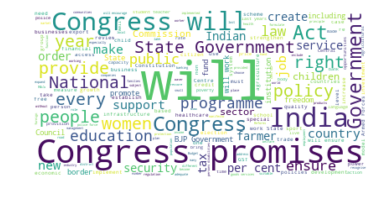

In [8]:
wordcloud = WordCloud(background_color="white").generate(congress_manifesto)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()    

We see many repetitions like "will","Congress","Government" etc.

## Let us look at the word cloud for the manifesto of Bharatiya Janata Party.

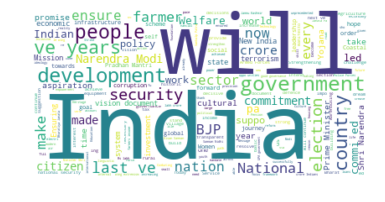

In [7]:
wordcloud = WordCloud(background_color="white").generate(bjp_manifesto)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

We will remove stop words and some words like "per","cent", etc. and see how the word cloud looks.

In [23]:
stopwords = set(STOPWORDS)
stopwords.update(["per", "cent","ve"])

## Word cloud for INC after stopword removal

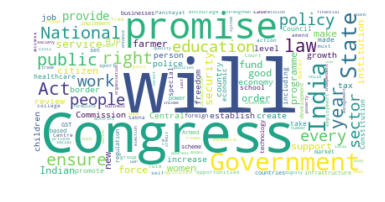

In [24]:

#Generate a word cloud image
wordcloud = WordCloud(stopwords=stopwords, background_color="white",
                      collocations=False,random_state=2,max_words=500).generate(congress_manifesto)

# Display the generated image:
# the matplotlib way:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

## Word cloud for BJP after stopword removal

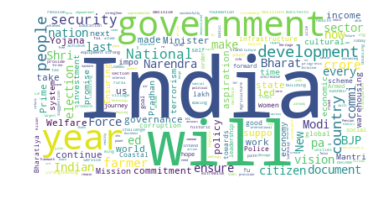

In [25]:
#Generate a word cloud image
wordcloud = WordCloud(stopwords=stopwords, background_color="white",
                      collocations=False,random_state=2,max_words=500).generate(bjp_manifesto)

# Display the generated image:
# the matplotlib way:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

I got greedy and thought of applying the party logos of the word clouds to see how it will look.Ideally the mask image has to have all white part of the mask should be 255 not 0.It was difficult to get good logo images that satisfies these conditions.So I mae use of the images I could manage.INC's logo proved effective,but applying BJP's logo didn'thelp much.

## Applying a logo mask

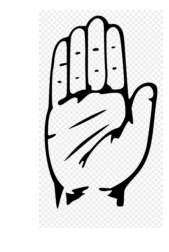

In [12]:
congress_logo= np.array(Image.open("congress_logo.png"))
plt.imshow(congress_logo, interpolation='bilinear')
plt.axis("off")
plt.show()

In [26]:
congress_logo.shape

(1552, 880, 3)

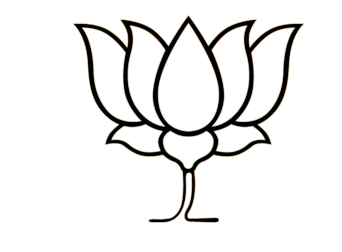

In [124]:
bjp_logo = np.array(Image.open("bjp_logo1.png"))
plt.imshow(bjp_logo, interpolation='bilinear')
plt.axis("off")
plt.show()

In [114]:
bjp_logo.shape

(1962, 2000, 4)

Use the transform_format() function to swap number 0 to 255.

In [16]:
def transform_format(val):
    if val == 0:
        return 255
    else:
        return val

In [17]:
transformed_congress_logo = np.ndarray((congress_logo.shape[0],congress_logo.shape[1]), np.int32)
for i in range(len(congress_logo)):
    transformed_congress_logo[i] = list(map(transform_format, congress_logo[i,:,0]))

In [125]:
transformed_bjp_logo = np.ndarray((bjp_logo.shape[0],bjp_logo.shape[1]), np.int32)
for i in range(len(bjp_logo)):
    transformed_bjp_logo[i] = list(map(transform_format, bjp_logo[i,:,1]))

## Applying INC logo

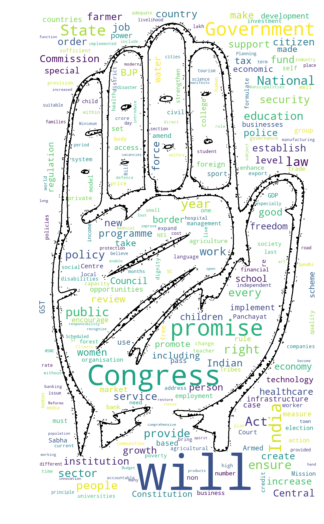

In [35]:
#Generate a word cloud image for INC
congress_wordcloud = WordCloud(stopwords=stopwords, background_color="white",
                      collocations=False,random_state=2,max_words=250,
                      mask=transformed_congress_logo,contour_width=2, contour_color='black').generate(congress_manifesto)

plt.figure(figsize=(13,9))
plt.imshow(congress_wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

This looks good enough.

## Applying BJP logo

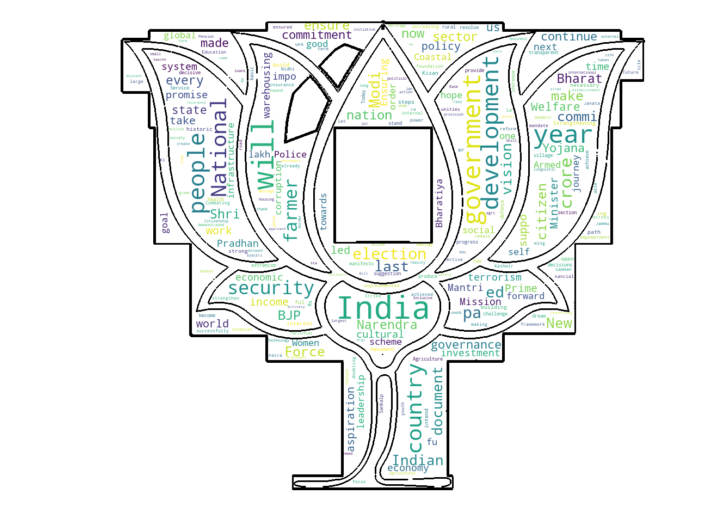

In [127]:
#Generate a word cloud image for BJP
bjp_wordcloud = WordCloud(stopwords=stopwords, background_color="white",
                      collocations=False,random_state=2,max_words=250,
                          mask=transformed_bjp_logo,contour_width=2, contour_color='black').generate(bjp_manifesto)

plt.figure(figsize=(13,9))
plt.imshow(bjp_wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

Well...Not exactly what I wanted.Looks like our BJP logo has a white ractangle inside it.Clearly our choice of logo image is not upto the mark :p